Train accuracy: 1.0
Test accuracy: 1.0
CV accuracy: 0.9970149253731343
Dummy accuracy: 0.5952380952380952
[[50  0]
 [ 0 34]]
Precision: 1.0
Recall: 1.0
F1 score: 1.0


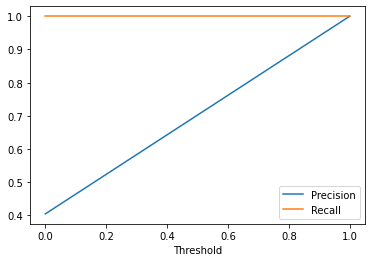

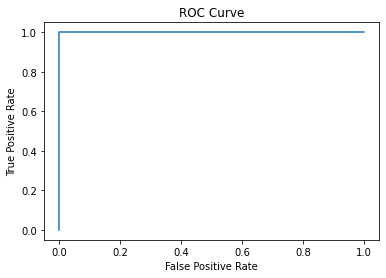

In [10]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

# Cargar los datos del conjunto de datos del Titanic
data = pd.read_csv('/home/juan-pablo/Escritorio/Sist inteligente/datasets/tested.csv')

# Dividir el conjunto de datos en entrenamiento y prueba
X = data.drop(['Survived'], axis=1)
y = data['Survived']
X = X.dropna(axis=1, thresh=len(X))

# Codificar las variables categóricas
le = LabelEncoder()
X['Name'] = le.fit_transform(X['Name'])
X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'])
X['Ticket'] = le.fit_transform(X['Ticket'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesar los datos y escalarlos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Seleccionar un modelo para entrenar
model = SGDClassifier()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Evaluar el modelo
# Medir accuracy con solo entrenamiento y prueba
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

# Medir accuracy con validación cruzada K-fold para evaluar el modelo
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print('CV accuracy:', cv_scores.mean())

# Comparar el rendimiento del clasificador mediante DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train_scaled, y_train)
dummy_accuracy = dummy_model.score(X_test_scaled, y_test)
print('Dummy accuracy:', dummy_accuracy)

# Implementar la matriz de confusión
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Implementar precision (cuantas veces mi modelo **dice** es realmente cierto)
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Implementar recall (cuantas veces mi modelo es capaz de identificar la verdad)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

# Implementar f1 score (mezcla de precision y recall)
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

# Implementar el tradeoff de recall y precision, a partir de los umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

# Implementar la curva de ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()